# Microsoft Malware Prediction competition on Kaggle

### Goal: The general idea is to predict which devices are most likely to be infected by malware based on device characteristics.

Link to the competition website: https://www.kaggle.com/c/microsoft-malware-prediction

__General steps to take:__
1. Import the dataset and get a feeling for the data.
2. EDA (exploratory data analysis) to get first insights and get familiar with the data set.
3. Clean the data, processing of data into format that can be used by ML algorithms.
4. Build the model and train the model.
5. Evaluate the model.
6. Change hyper-parameters to improve model performance.
7. (Deploy model to be actually usable but skipped here.)

<img src="1_PAqzvCxPjpDN8RC9HQw45w.png">

## Import all libraries and the dataset, then get a 'feeling' for the data:

In [1]:
#!/usr/bin/python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

#import standard ML libs
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
print('Lib import check positive ++.')

Lib import check positive ++.


**Import the dataset (or a sample of the entire file) and get a feeling for the data:**

In [2]:
%%time
#import the data and get a feeling for which columns and data types it contains:
df = pd.read_csv('train.csv',nrows=100000, encoding='utf8', engine='python')
print('='*15 + 'Dataframe column overview: ' + '='*15)
print(df.describe())
print('='*15 + 'Dataframe dimensions: ' + '='*15)
print(df.shape)
print('='*15 + 'All column names: ' + '='*15)
print(df.columns.values)

===============Dataframe column overview: ===============
         IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
count  100000.0      99639.000000     100000.000000   
mean        0.0          6.845643          0.017630   
std         0.0          1.025645          0.131603   
min         0.0          0.000000          0.000000   
25%         0.0          7.000000          0.000000   
50%         0.0          7.000000          0.000000   
75%         0.0          7.000000          0.000000   
max         0.0          8.000000          1.000000   

       DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
count                4890.000000               99607.000000   
mean                 1637.011247               47876.296023   
std                   999.936760               14023.317478   
min                     1.000000                  39.000000   
25%                   788.000000               49480.000000   
50%                  1632.000000               53447.000000   
75%  

In [52]:
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
5,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
6,0000161e8abf8d8b89c5ab8787fd712b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.845.0,0,7.0,0,NaN,43927.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1
7,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,NaN,53447.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,NaN,53447.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
9,00001a18d69bb60bda9779408dcf02ac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.973.0,0,7.0,0,NaN,46413.0,...,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1


In [9]:
#check each column for how many unique values it contains:
unique_values = df.nunique().sort_values()
print(unique_values)

Census_IsFlightsDisabled                                1
PuaMode                                                 1
SMode                                                   1
IsBeta                                                  1
Census_IsWIMBootEnabled                                 1
Census_ThresholdOptIn                                   1
AutoSampleOptIn                                         1
Census_IsFlightingInternal                              1
Firewall                                                2
UacLuaenable                                            2
Census_DeviceFamily                                     2
Census_HasOpticalDiskDrive                              2
Census_ProcessorClass                                   2
Census_IsSecureBootEnabled                              2
Census_IsVirtualDevice                                  2
Census_IsTouchEnabled                                   2
Census_IsPenCapable                                     2
Census_IsAlway

__Seems like the dataframe has 83 columns of mixed types (binary and non-binary). The 'MachineIdentifier' column seems to be the only column with all unique columns.__

## EDA (Exploratory Data Analysis):

First ideas and hypotheses: 
1. Touch-enabed devices are more likely to be mobile devices without anti-virus software so they have more malware.
2. Same goes for pen-cabable devices, those are probably not PCs/ Laptops with better anti-malware software.
3. "Census_IsAlwaysOnAlwaysConnectedCapable" could indicate IoT devices that probably have worse anti-malware software so they have more Malware.

**1. Touch enabled devices:**

In [12]:
#select touch enabled devices and see if they have a higher chance of being affected by malware:
df_touchenabled = df[['Census_IsTouchEnabled','HasDetections']]
df_touchenabled[['Census_IsTouchEnabled']] = df_touchenabled[['Census_IsTouchEnabled']].astype(bool)
df_touchenabled_pivot_avg = pd.pivot_table(df_touchenabled, values = 'HasDetections', index=['Census_IsTouchEnabled'])
df_touchenabled_pivot_count = pd.pivot_table(df_touchenabled, values = 'HasDetections', index=['Census_IsTouchEnabled'], aggfunc='count')
print("Dataframe dimensions: ", df_touchenabled.shape)
print(df_touchenabled_pivot_avg)
print(df_touchenabled_pivot_count)

Dataframe dimensions:  (100000, 2)
                       HasDetections
Census_IsTouchEnabled               
False                       0.506529
True                        0.448732
                       HasDetections
Census_IsTouchEnabled               
False                          87458
True                           12542


C:\Users\Lorenz\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


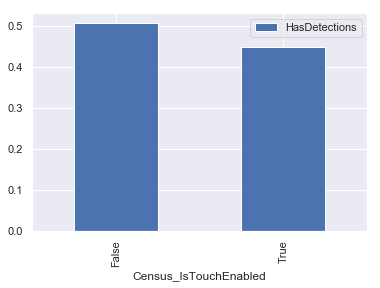

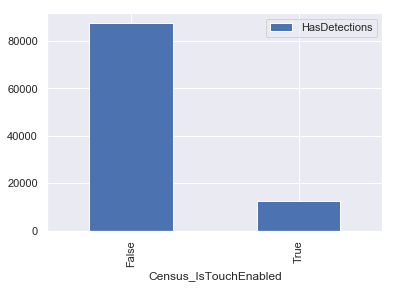

In [19]:
df_touchenabled_pivot_avg.plot(kind='bar')
df_touchenabled_pivot_count.plot(kind='bar')

 --> Interestingly, touch-enabled devices actually seem to have a lower probability to have malware than non-touch devices. But also keeping in mind that around 87,5 % of all devices in the sample are not touch-enabled.

**2. Pen enabled devices:**

In [13]:
#select touch enabled devices and see if they have a higher chance of being affected by malware:
df_pen_enabled = df[['Census_IsPenCapable','HasDetections']]
df_pen_enabled[['Census_IsPenCapable']] = df_pen_enabled[['Census_IsPenCapable']].astype(bool)
df_pen_enabled_pivot_avg = pd.pivot_table(df_pen_enabled, values = 'HasDetections', index=['Census_IsPenCapable'])
df_pen_enabled_pivot_count = pd.pivot_table(df_pen_enabled, values = 'HasDetections', index=['Census_IsPenCapable'], aggfunc='count')
print("Dataframe dimensions: ", df_pen_enabled.shape)
print(df_pen_enabled_pivot_avg)
print(df_pen_enabled_pivot_count)

Dataframe dimensions:  (100000, 2)
                     HasDetections
Census_IsPenCapable               
False                     0.500286
True                      0.473217
                     HasDetections
Census_IsPenCapable               
False                        96285
True                          3715


C:\Users\Lorenz\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


 --> Only around 3.7% are pen-capable, but pen-enabled devices seem to have a marginally lower probability to be affected by malware, although the difference is smaller than with the touch-enabled feature.

**3. IoT devices:**

In [16]:
#select touch enabled devices and see if they have a higher chance of being affected by malware:
df_alwaysConnected = df[['Census_IsAlwaysOnAlwaysConnectedCapable','HasDetections']]
df_alwaysConnected[['Census_IsAlwaysOnAlwaysConnectedCapable']] = df_alwaysConnected[['Census_IsAlwaysOnAlwaysConnectedCapable']].astype(bool)
df_alwaysConnected_pivot_avg = pd.pivot_table(df_alwaysConnected, values = 'HasDetections', index=['Census_IsAlwaysOnAlwaysConnectedCapable'])
df_alwaysConnected_pivot_count = pd.pivot_table(df_alwaysConnected, values = 'HasDetections', index=['Census_IsAlwaysOnAlwaysConnectedCapable'],aggfunc='count')
print("Dataframe dimensions: ", df_alwaysConnected.shape)
print(df_alwaysConnected_pivot_avg)
print(df_alwaysConnected_pivot_count)

Dataframe dimensions:  (100000, 2)
                                         HasDetections
Census_IsAlwaysOnAlwaysConnectedCapable               
False                                         0.506891
True                                          0.390620
                                         HasDetections
Census_IsAlwaysOnAlwaysConnectedCapable               
False                                            93454
True                                              6546


C:\Users\Lorenz\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


 --> Only around 6.5% are suspected IoT devices, but they seem to have a lower rate of infection with Malware.

## Machine Learning:

**Preprocessing: Get the columns with only 2 or 3 unique values as a starting point to separate into individual columns, otherwise the number of columns will get huge:**

In [23]:
#make a list with all the columns that have only 2 unique values in them:
print('====Only 2 unique values.')
df_unique_values_two = unique_values[unique_values == 2]
list_two_unique_value_columns = (list(df_unique_values_two.index))
print(list_two_unique_value_columns)

#make a list with all the columns that have only 3 unique values in them:
print('====Only 3 unique values.')
df_unique_values_three = unique_values[unique_values == 3]
list_three_unique_value_columns = (list(df_unique_values_three.index))
print(list_three_unique_value_columns)

#concatenate to get a list of all column names with 2 or 3 unique values
list_two_three_unique_value_columns = list_two_unique_value_columns + list_three_unique_value_columns

====Only 2 unique values.
['Firewall', 'UacLuaenable', 'Census_DeviceFamily', 'Census_HasOpticalDiskDrive', 'Census_ProcessorClass', 'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'Census_IsPortableOperatingSystem', 'IsProtected', 'HasDetections', 'ProductName', 'HasTpm', 'IsSxsPassiveMode']
====Only 3 unique values.
['OsSuite', 'Census_OSArchitecture', 'OsVer', 'Processor', 'Census_ProcessorManufacturerIdentifier']


In [29]:
#make dataframe of the original with only the columns that have two unique values:
df_two_three_uniques = df[list_two_three_unique_value_columns]
print(df_two_uniques.head(3))

   Firewall  UacLuaenable Census_DeviceFamily  Census_HasOpticalDiskDrive  \
0       1.0           1.0     Windows.Desktop                           0   
1       1.0           1.0     Windows.Desktop                           0   
2       1.0           1.0     Windows.Desktop                           0   

  Census_ProcessorClass  Census_IsSecureBootEnabled  Census_IsVirtualDevice  \
0                   NaN                           0                     0.0   
1                   NaN                           0                     0.0   
2                   NaN                           0                     0.0   

   Census_IsTouchEnabled  Census_IsPenCapable  \
0                      0                    0   
1                      0                    0   
2                      0                    0   

   Census_IsAlwaysOnAlwaysConnectedCapable  \
0                                      0.0   
1                                      0.0   
2                                      